### Cleaning Data

This dataset contains the information about listings of airbnb in New York City for the year 2019. This data contains information about id, host_name, neighbourhood_group, neighbourhood, room_type, price, review details and availability during the year. This notebook involves datacleaning and exploratory data analysis to gain insights about Airbnbs in New York City and their pricing based on their various factors.

### LOAD THE DATA

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\New York City Airbnb Open Data\AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Removing the Duplicate values


In [5]:
for column in data.columns:
    if data[column].isnull().sum() !=0:
        print(f'{column} --> Missing Values: {data[column].isnull().sum()}, dtypes: {data[column].dtypes}')

name --> Missing Values: 16, dtypes: object
host_name --> Missing Values: 21, dtypes: object
last_review --> Missing Values: 10052, dtypes: object
reviews_per_month --> Missing Values: 10052, dtypes: float64


In [6]:
data['last_review'] = pd.to_datetime(data.last_review)

In [7]:
data.last_review.isnull().sum()

10052

In [8]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,1.373221,1,23


In [9]:
data.last_review.fillna(method = "ffill", inplace = True)

C:\Users\ebich\AppData\Local\Temp\ipykernel_12456\3598644647.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.last_review.fillna(method = "ffill", inplace = True)


In [23]:
for i in data.columns:
    if data[i].isnull().sum() !=0:
        print(f'{i} --> Missing Values: {data[i].isnull().sum()}, dtypes: {data[i].dtypes}')

name --> Missing Values: 16, dtypes: object
host_name --> Missing Values: 21, dtypes: object


In [24]:
for column in data.columns:
    if data[column].isnull().sum() != 0:
        data[column] = data[column].fillna(data[column].mode()[0])

In [26]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [27]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-14 06:10:06.540546304,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-31 00:00:00,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-25 00:00:00,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.497775,32.952519,131.622289


In [28]:
data.drop(['id', 'host_name'], axis = 'columns', inplace = True )
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


### Correlation Matrix

In [11]:
corr = data[['price','minimum_nights','number_of_reviews', 'calculated_host_listings_count',
             'availability_365','latitude','longitude','reviews_per_month']]
corr.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude,reviews_per_month
price,1.000000,0.042799,-0.047954,0.057472,0.081829,0.033939,-0.150019,-0.022373
minimum_nights,0.042799,1.000000,-0.080116,0.127960,0.144303,0.024869,-0.062747,-0.091942
number_of_reviews,-0.047954,-0.080116,1.000000,-0.072376,0.172028,-0.015389,0.059094,0.530093
calculated_host_listings_count,0.057472,0.127960,-0.072376,1.000000,0.225701,0.019517,-0.114713,-0.006701
availability_365,0.081829,0.144303,0.172028,0.225701,1.000000,-0.010983,0.082731,0.162980
latitude,0.033939,0.024869,-0.015389,0.019517,-0.010983,1.000000,0.084788,-0.009115
longitude,-0.150019,-0.062747,0.059094,-0.114713,0.082731,0.084788,1.000000,0.131599
reviews_per_month,-0.022373,-0.091942,0.530093,-0.006701,0.162980,-0.009115,0.131599,1.000000


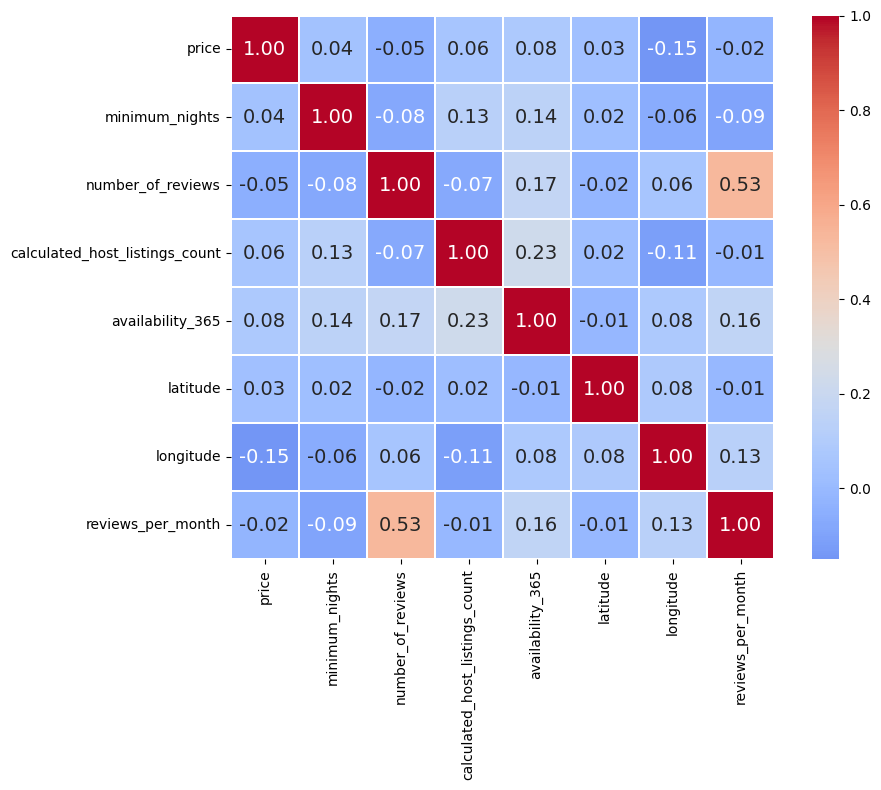

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10, 8])
sns.heatmap(corr.corr(),
            annot=True ,
            fmt = '.2f',
            annot_kws={"fontsize": 14},
            linewidths=0.25,
            center= 0.3,
            cmap= 'coolwarm',
            square=True)

plt.tight_layout()
plt.show()

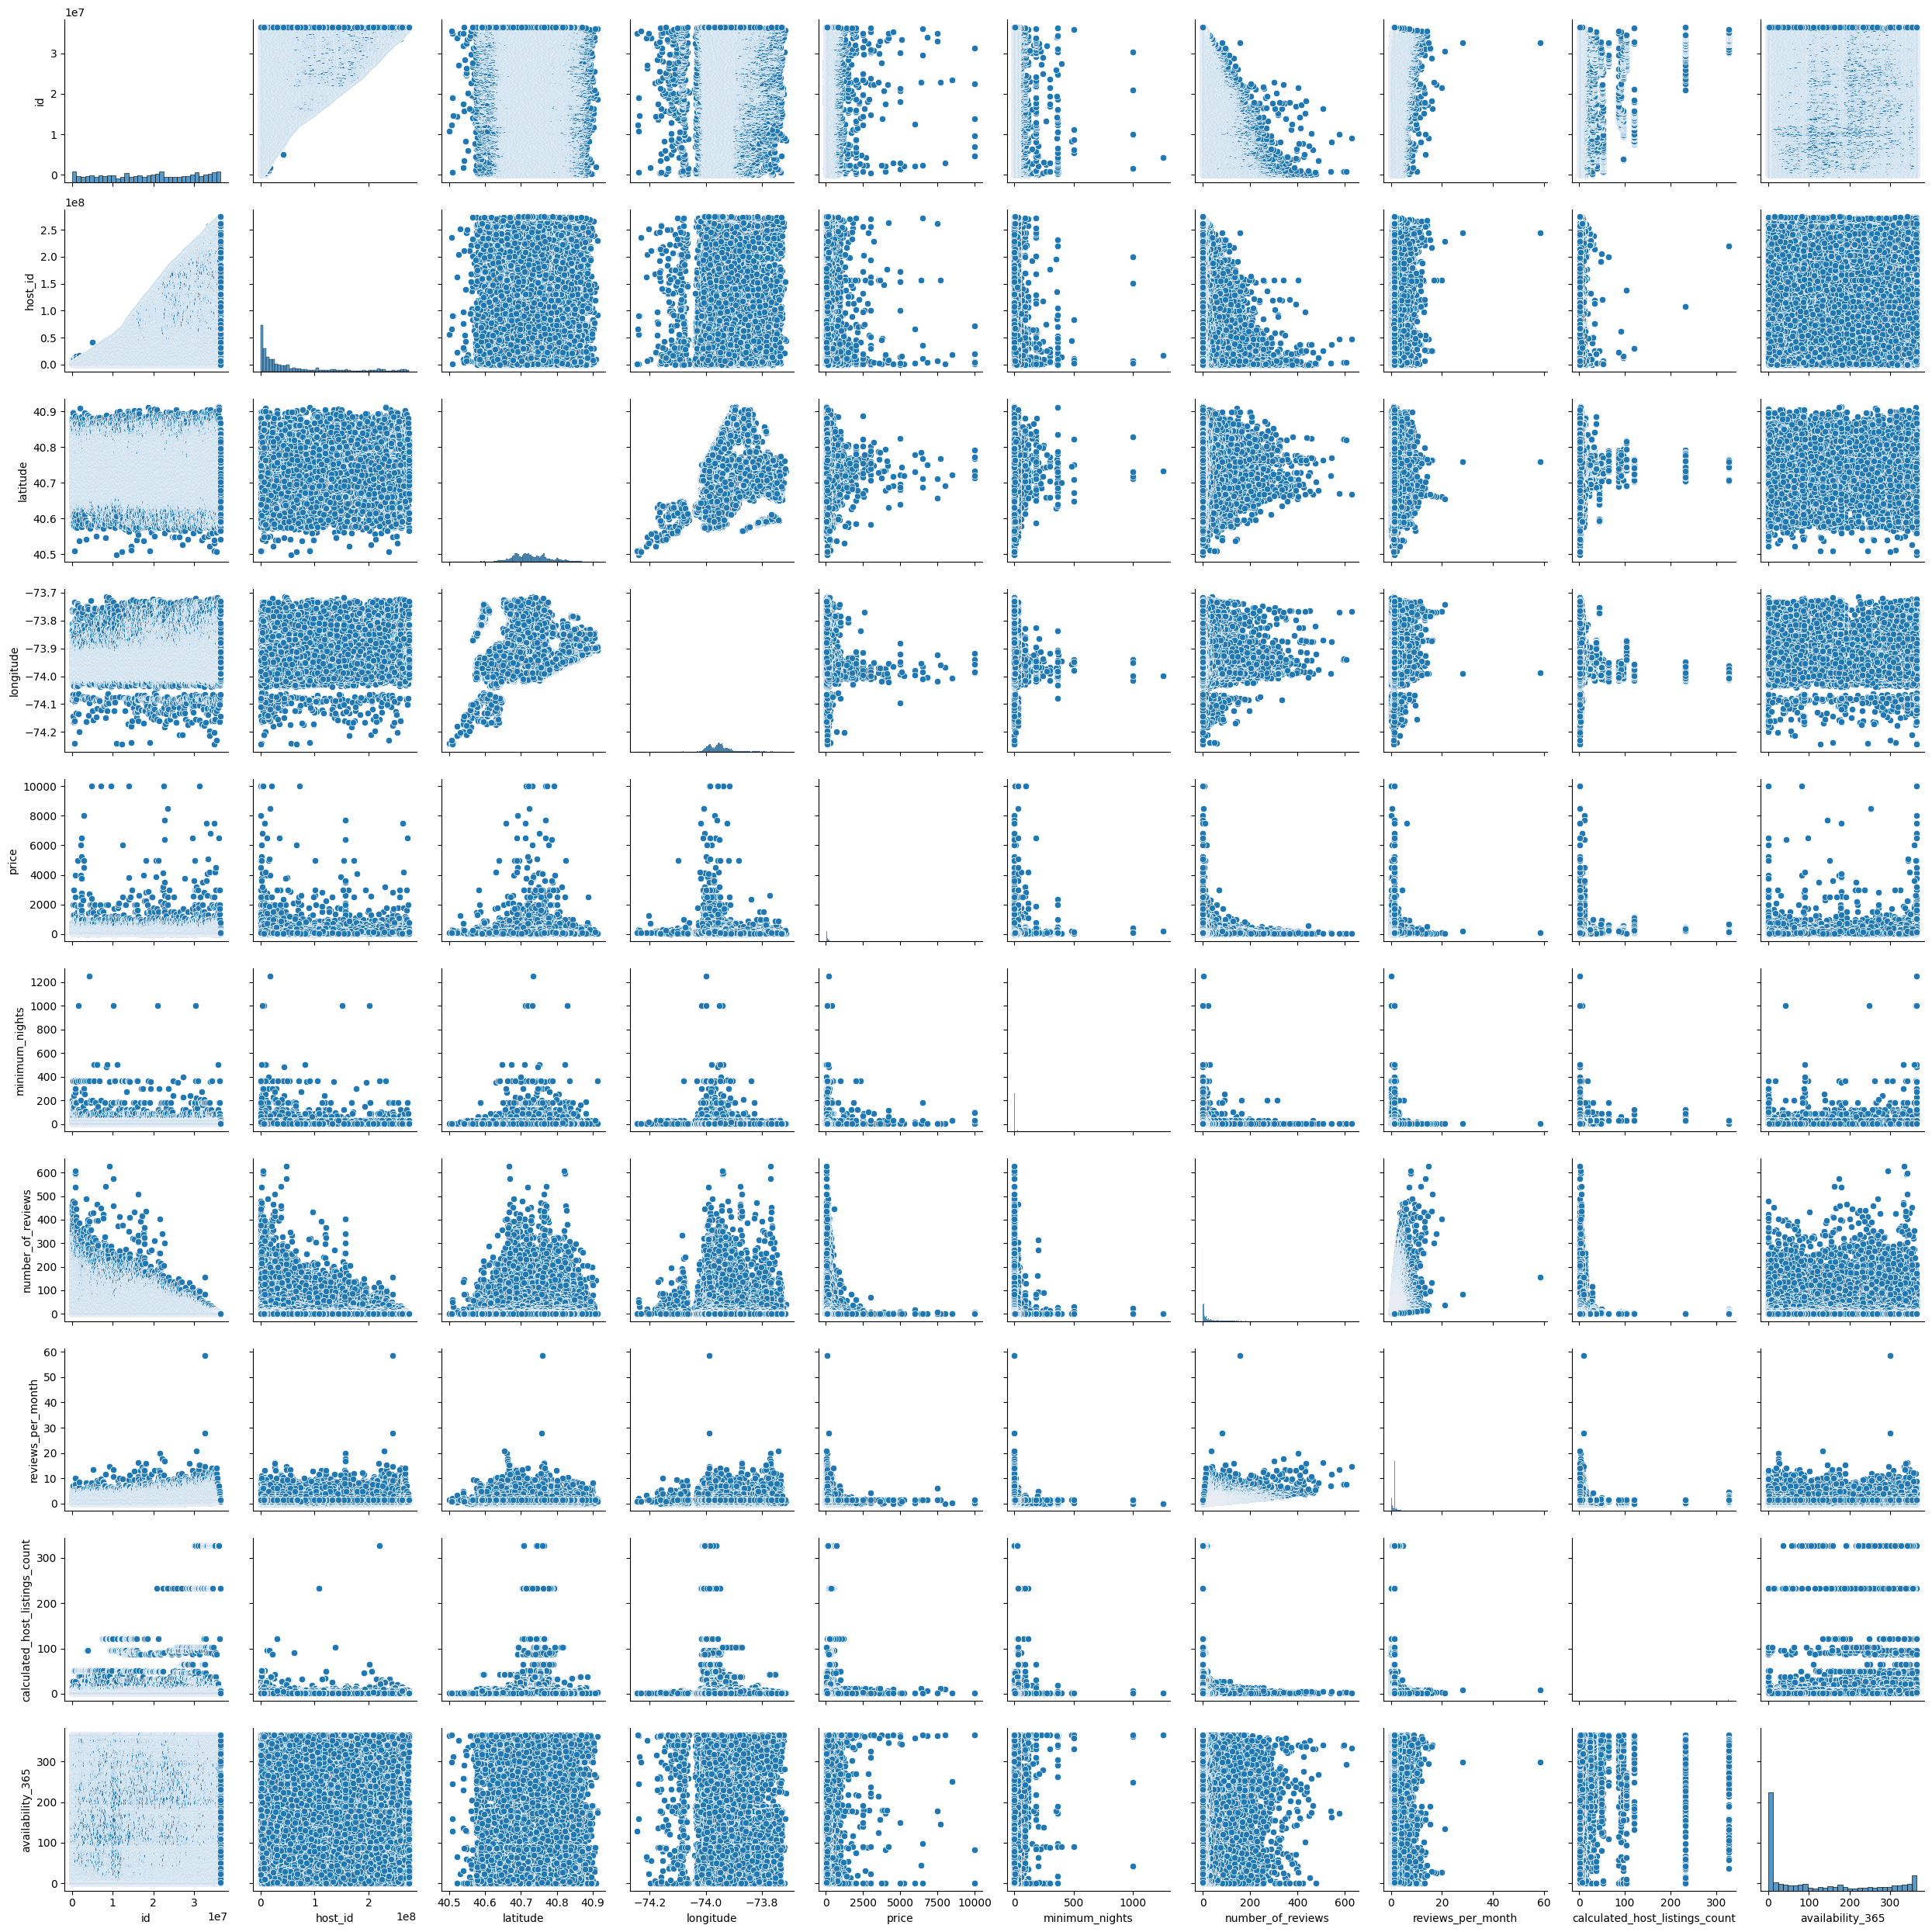

In [16]:
sns.pairplot(data)

plt.tight_layout()
plt.show()

In [19]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [20]:
brooklyn = data[data['neighbourhood_group'] == 'Brooklyn'].reset_index()
manhattan = data[data['neighbourhood_group'] == 'Manhattan'].reset_index()
queens = data[data['neighbourhood_group'] == 'Queens'].reset_index()
staten_island = data[data['neighbourhood_group'] == 'Staten Island'].reset_index()
bronx = data[data['neighbourhood_group'] == 'Bronx'].reset_index()

brooklyn.drop('index', axis=1, inplace=True)
manhattan.drop('index', axis=1, inplace=True)
queens.drop('index', axis=1, inplace=True)
staten_island.drop('index', axis=1, inplace=True)
bronx.drop('index', axis=1, inplace=True)
bronx.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.040000,3,353
1,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.450000,3,323
2,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,2016-08-29,1.373221,7,349
3,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.500000,13,365
4,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.350000,2,346


### Outliers Detections

Identifying the outliers and apply the chosen treatment strategies to address outliers in the dataset.

In [21]:
def outliers(dataset, columns):
    for column in columns:
        q = dataset[column].quantile(0.95)
        dataset = dataset[dataset[column] < q]
    return dataset

In [22]:
outliers(brooklyn, ['price', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month'])
outliers(manhattan, ['price', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month'])
outliers(queens, ['price', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month'])
outliers(staten_island, ['price', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month'])
outliers(bronx, ['price', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month'])

brooklyn = brooklyn.loc[brooklyn['minimum_nights'] < brooklyn['minimum_nights'].quantile(0.90)]
manhattan = manhattan.loc[manhattan['minimum_nights'] < manhattan['minimum_nights'].quantile(0.90)]
queens = queens.loc[queens['minimum_nights'] < queens['minimum_nights'].quantile(0.90)]
staten_island = staten_island.loc[staten_island['minimum_nights'] < staten_island['price'].quantile(0.90)]
bronx = bronx.loc[bronx['minimum_nights'] < bronx['minimum_nights'].quantile(0.90)]

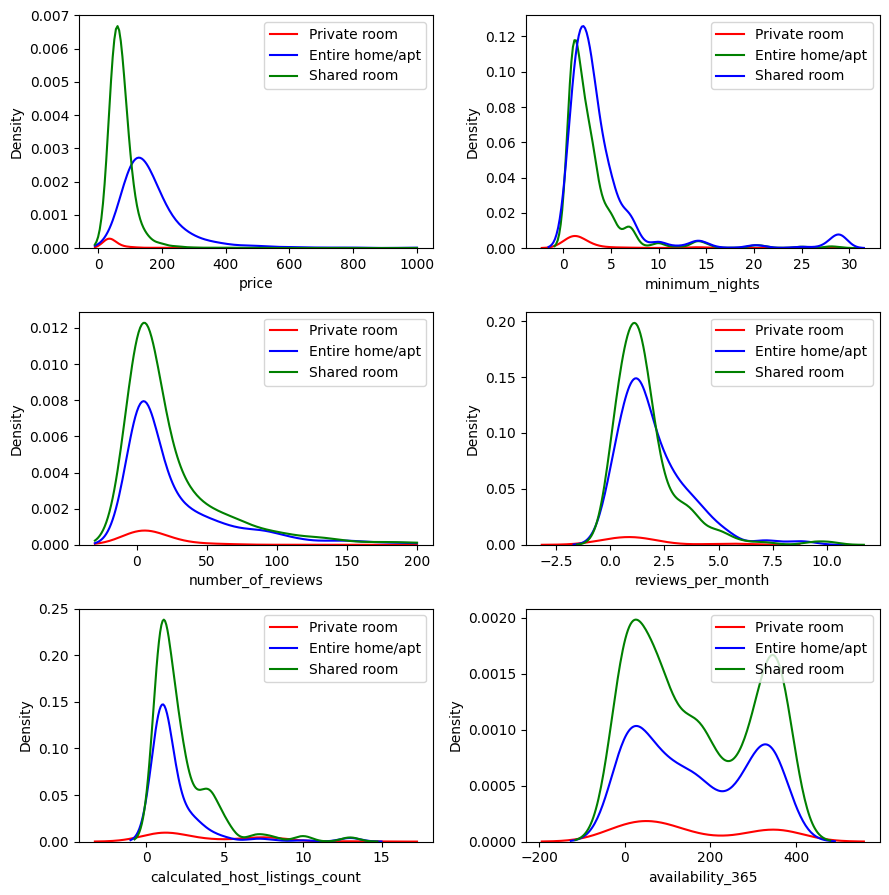

In [24]:
dis_legend = ['Private room', 'Entire home/apt', 'Shared room']
rooms_colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red'}
plt.figure(figsize=(9, 9))

plt.subplot(3, 2, 1)
sns.kdeplot(data=brooklyn, x='price', hue='room_type',
            clip=(-10, 1000), palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.subplot(3, 2, 2)
sns.kdeplot(data=manhattan, x='minimum_nights', hue='room_type',
            clip=(-10, 100), palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.subplot(3, 2, 3)
sns.kdeplot(data=queens, x='number_of_reviews', hue='room_type',
            clip=(-30, 200), palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.subplot(3, 2, 4)
sns.kdeplot(data=staten_island, x='reviews_per_month', hue='room_type',
            clip=(-10, 15), palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.subplot(3, 2, 5)
sns.kdeplot(data=bronx, x='calculated_host_listings_count', hue='room_type',
            clip=(-10, 50), palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.subplot(3, 2, 6)
sns.kdeplot(data=bronx, x='availability_365', hue='room_type',
            palette=rooms_colors)
plt.legend(dis_legend, loc='upper right')

plt.tight_layout()
plt.show()

In [27]:
numeric_features = data.select_dtypes(include=["int64","float64"]).columns
categorical_features = data.select_dtypes(include=["object"]).columns
print(numeric_features)
print(categorical_features)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


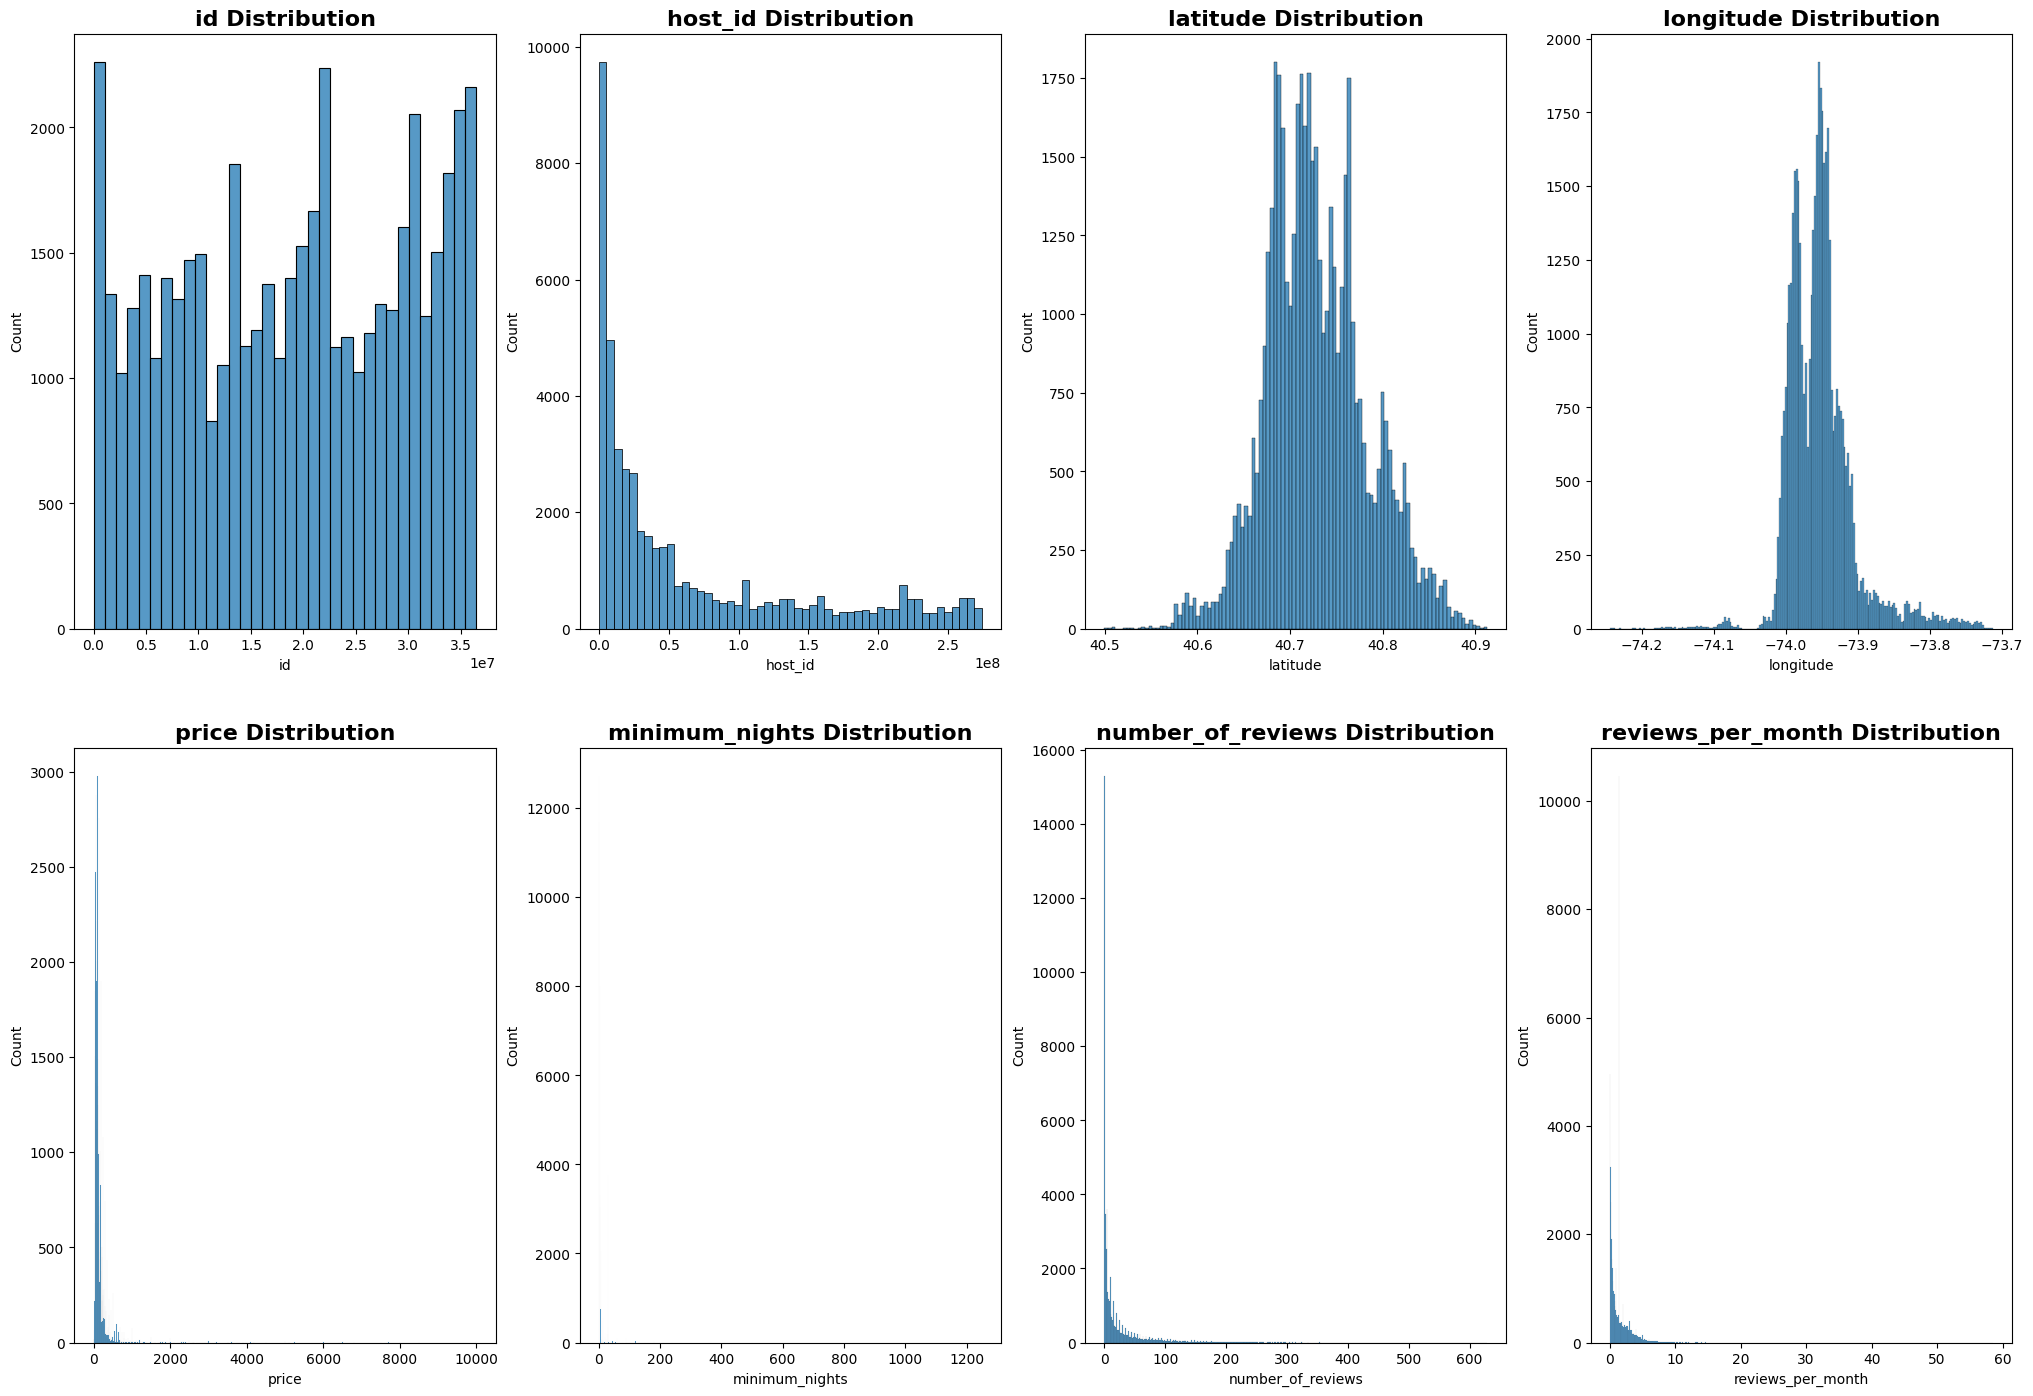

In [28]:
def draw_plot(data, val, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    aux = 0
    fig.set_figheight(17)
    fig.set_figwidth(25)
    for row in axes:
        for col in row:
            sns.histplot(data, x=val[aux], ax=col)
            col.set_title(val[aux] + " Distribution", fontsize=16, fontweight="bold")
            aux += 1

# Visualizing the distribution for every numeric feature
draw_plot(data, numeric_features, 2, 4)

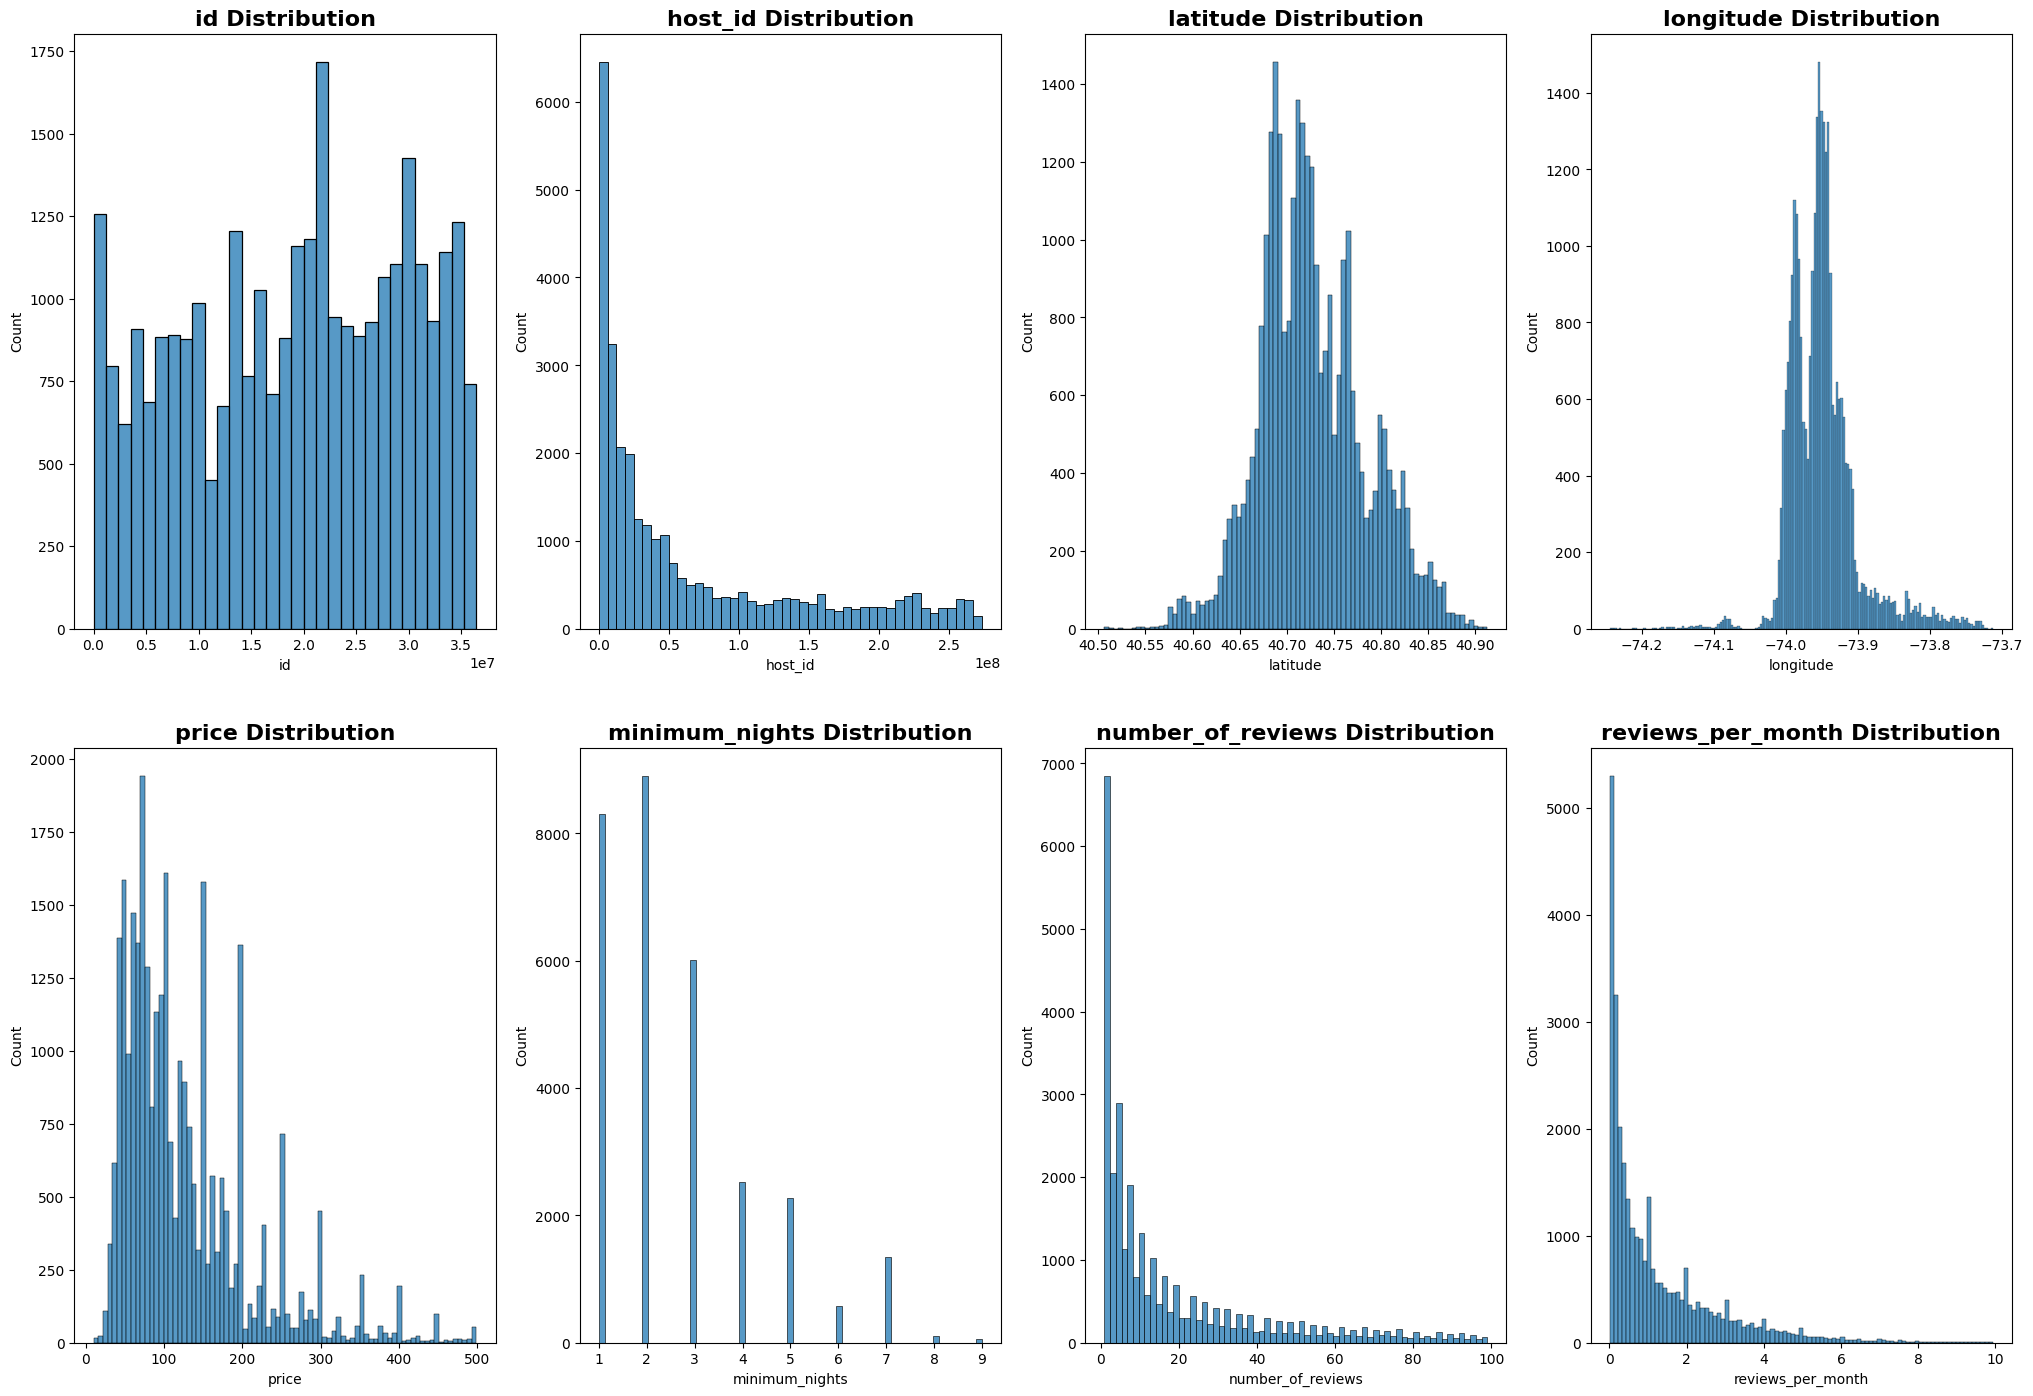

In [29]:
data = data[data["price"]>0]
data = data[data["price"]<500]
data = data[data["minimum_nights"]<10]
data = data[data["number_of_reviews"]>0]
data = data[data["number_of_reviews"]<100]
data = data[data["reviews_per_month"]>0]
data = data[data["reviews_per_month"]<10]
data = data[data["calculated_host_listings_count"]<10]

draw_plot(data, numeric_features, 2, 4)

<Axes: >

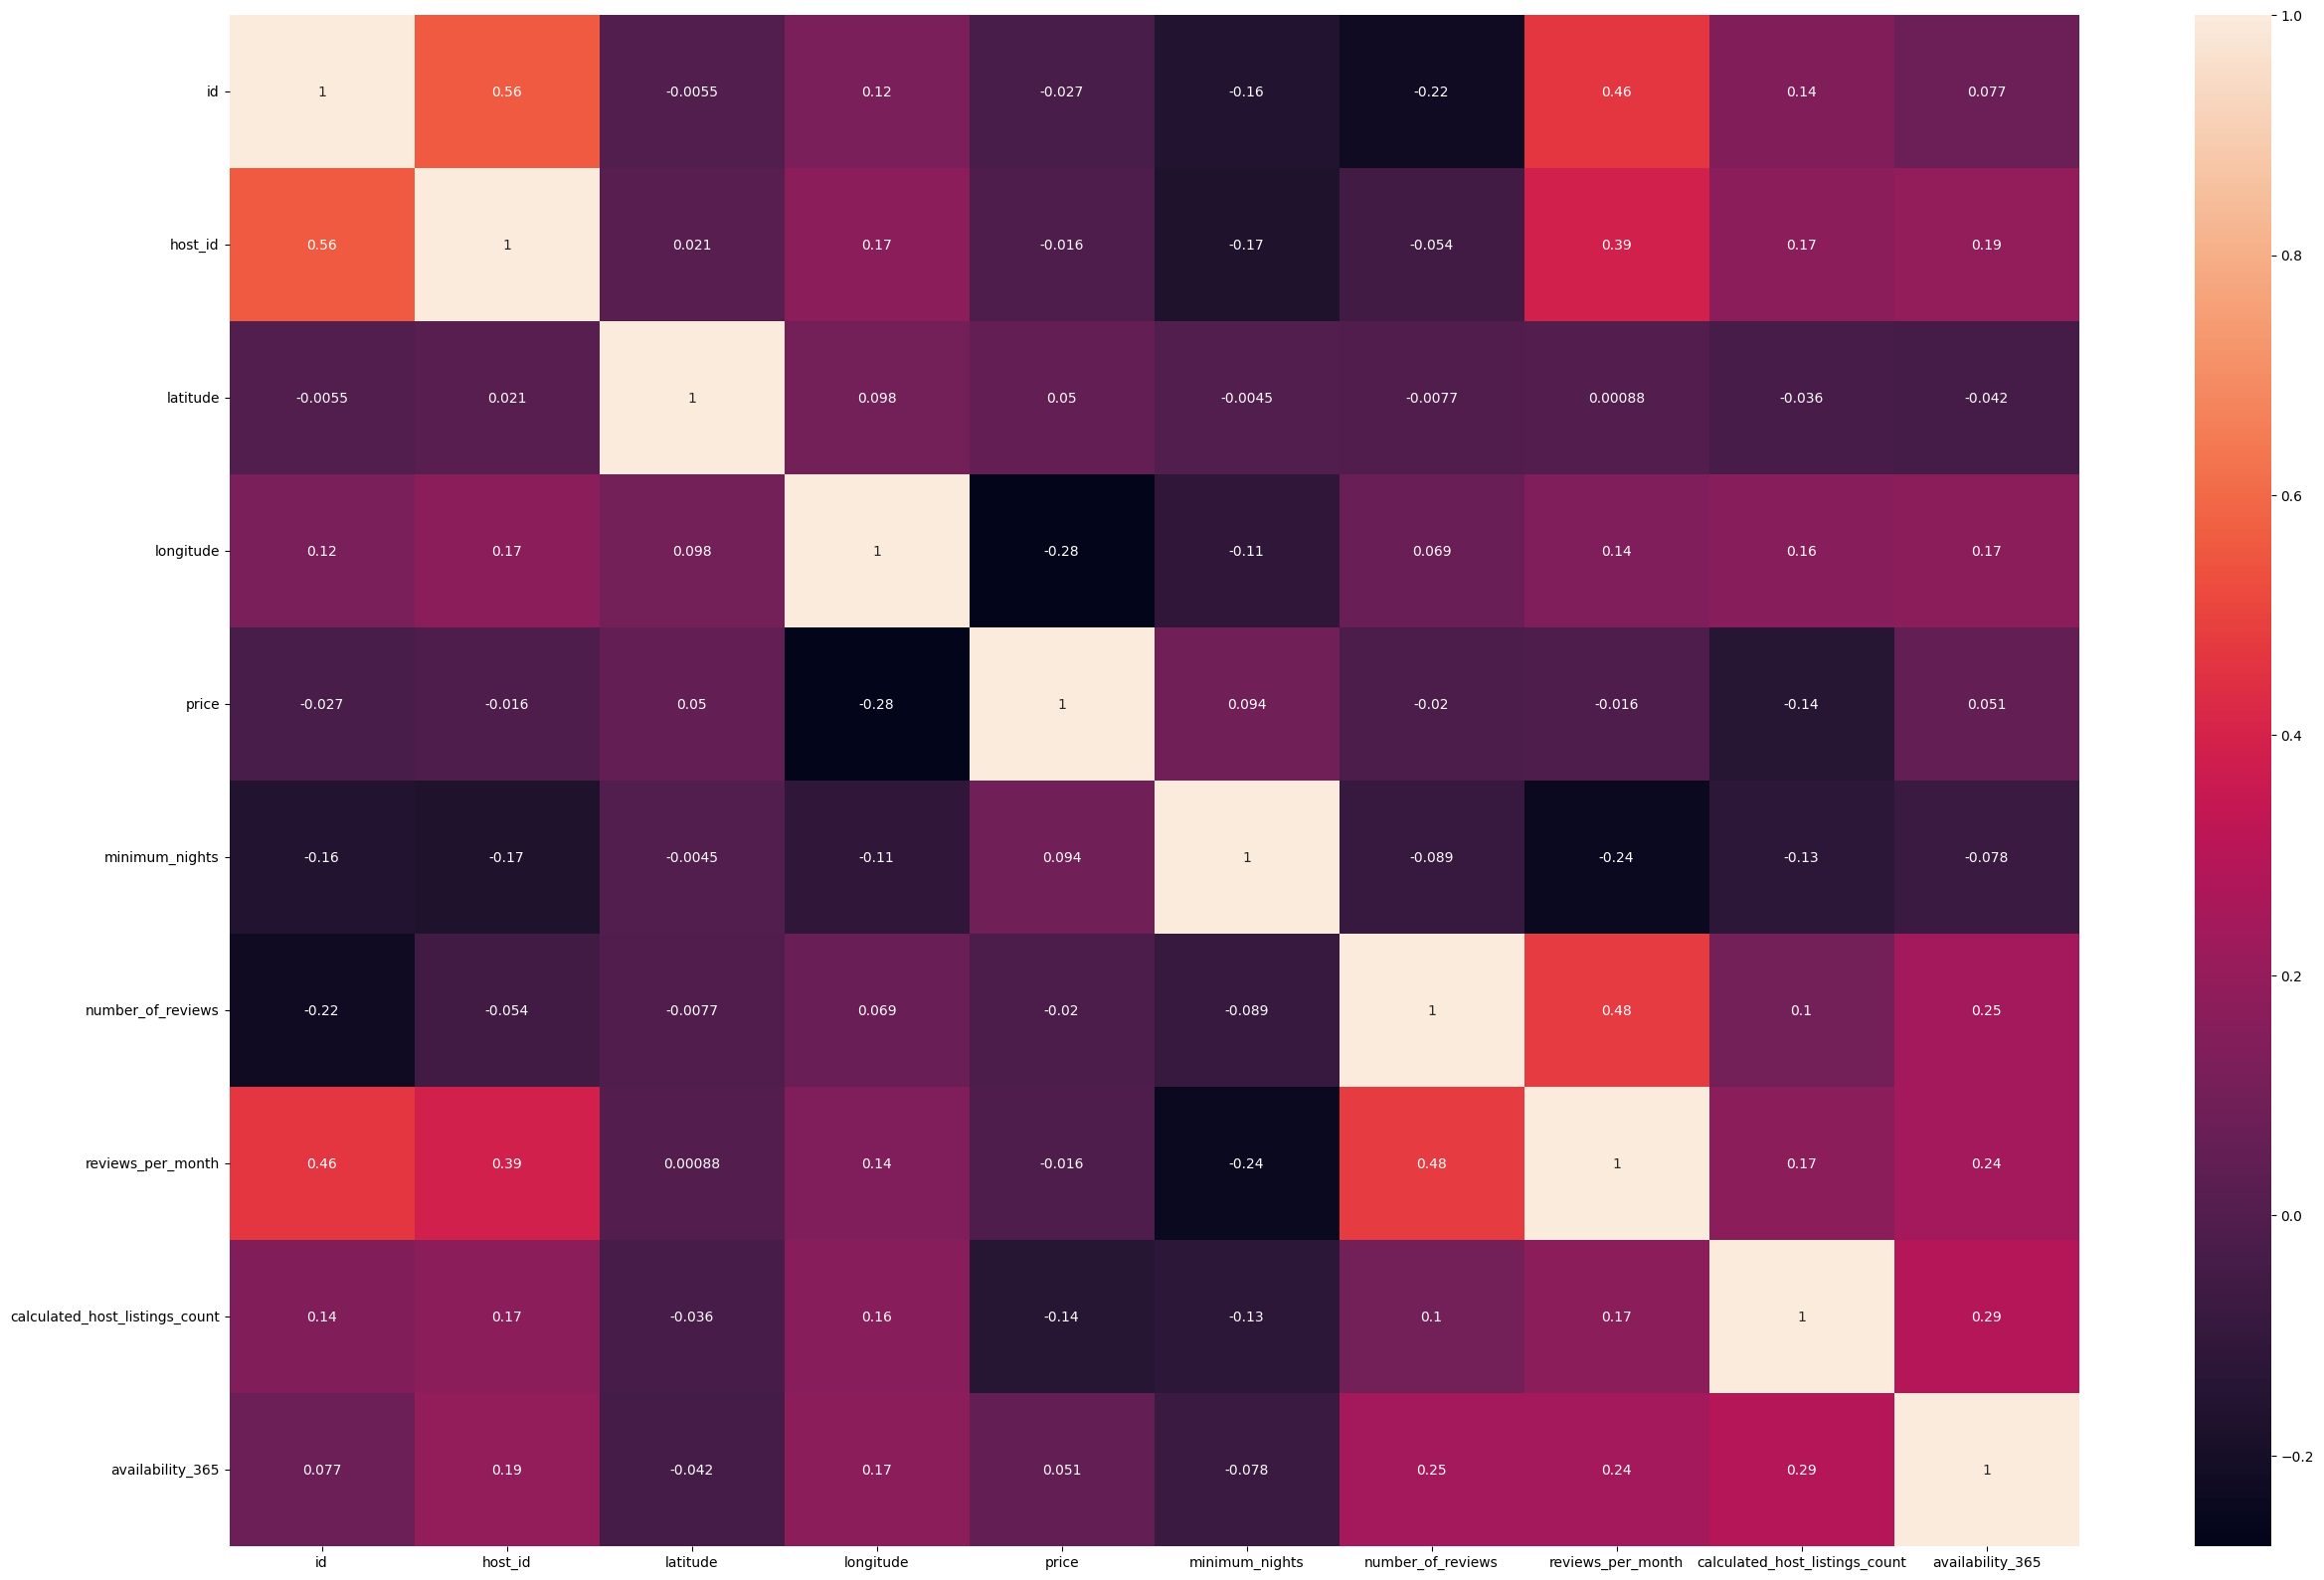

In [30]:
plt.figure(figsize=(30, 20))
sns.heatmap(data[numeric_features].corr(), annot=True)

In [32]:
feature_columns = ["neighbourhood_group", "room_type", "price", "minimum_nights", "calculated_host_listings_count", "availability_365"]
all_data = data[feature_columns]
all_data.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
5,Manhattan,Entire home/apt,200,3,1,129
10,Manhattan,Entire home/apt,135,5,1,6
18,Brooklyn,Entire home/apt,99,3,1,21


### Results

Data cleaning is a crucial step in the data analysis process, aimed at rectifying or eliminating erroneous, incomplete, or duplicate data within a dataset. This report provides an overview of the importance of data cleaning, its significance in ensuring reliable outcomes, and outlines several projects designed to test and enhance data cleaning skills.

Reliable Outcomes: Messy data can lead to inaccurate analyses and unreliable insights. Data cleaning ensures that the data used for analysis is accurate and consistent, thereby improving the reliability of outcomes.
Enhanced Decision Making: Clean data allows for more informed decision-making processes, as stakeholders can have confidence in the integrity of the data driving their decisions.
Cost Efficiency: Correcting errors and eliminating redundancies in the data can save time and resources that would otherwise be wasted on analyzing flawed datasets.